In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
code_url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv'
df = pd.read_csv(code_url)
df.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   True_index           640840 non-null  int64 
 1   Store_ID             640840 non-null  int64 
 2   Day_of_week          640840 non-null  int64 
 3   Date                 640840 non-null  object
 4   Nb_customers_on_day  640840 non-null  int64 
 5   Open                 640840 non-null  int64 
 6   Promotion            640840 non-null  int64 
 7   State_holiday        640840 non-null  object
 8   School_holiday       640840 non-null  int64 
 9   Sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [5]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# def clean_df(df):
#     df['Date'] = pd.to_datetime(df['Date'])
#     df['year'] = df['Date'].dt.year
#     df['month'] = df['Date'].dt.month
#     df['day'] = df['Date'].dt.day
#     df.columns = df.columns.str.lower()
    
#     df['state_holiday'] = df['state_holiday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})
    
#     df = pd.get_dummies(df, columns=['day_of_week', 'state_holiday'])
    
#     # Drop columns true_index and date
#     df = df.drop(['true_index', 'date'], axis=1)
    
#     df_cleaned = df.drop(['store_id', 'year', 'month', 'day'], axis=1)
    
#     scaler = MinMaxScaler().fit(df_cleaned[['nb_customers_on_day']])
#     df_cleaned['nb_customers_on_day'] = scaler.transform(df_cleaned[['nb_customers_on_day']])
    
#     df_cleaned.drop(['open', 'state_holiday_1'], axis=1, inplace=True)
    
#     return df_cleaned

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day


In [7]:
# Lower columns name
df.columns = df.columns.str.lower()
df.head()

,true_index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day
0,0,625,3,2013-11-06,641,1,1,0,0,7293,2013,11,6
1,1,293,2,2013-07-16,877,1,1,0,1,7060,2013,7,16
2,2,39,4,2014-01-23,561,1,1,0,0,4565,2014,1,23
3,3,676,4,2013-09-26,1584,1,1,0,0,6380,2013,9,26
4,4,709,3,2014-01-22,1477,1,1,0,0,11647,2014,1,22


In [8]:
# Come back to this!!!!!!
# Create a dictionary to hold the DataFrames for each store
store_dfs = {store_id: group for store_id, group in df.groupby('store_id')}

# Example: Access the DataFrame for a specific Store_ID
store_id = 625  # Replace with the desired Store_ID
store_df = store_dfs[store_id]

# Display the DataFrame for the specified Store_ID
print(store_df)

        true_index  store_id  day_of_week       date  nb_customers_on_day  \
0                0       625            3 2013-11-06                  641   
1212          1345       625            3 2014-04-23                  507   
2015          2230       625            1 2013-01-14                  587   
3407          3788       625            3 2014-03-12                  551   
4258          4733       625            3 2014-11-05                  741   
...            ...       ...          ...        ...                  ...   
633126      703526       625            4 2014-03-27                  544   
633231      703640       625            1 2014-01-27                  556   
634530      705091       625            4 2015-01-29                  649   
639385      710449       625            6 2014-02-15                  493   
640060      711183       625            4 2015-04-23                  533   

        open  promotion state_holiday  school_holiday  sales  year  month  

In [9]:
df.describe()

,true_index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,year,month,day
count,640840.000000,640840.000000,640840.000000,640840,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,2014-04-11 02:05:13.957930240,633.398577,0.830185,0.381718,0.178472,5777.469011,2013.832351,5.846555,15.711689
min,0.000000,1.000000,1.000000,2013-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,178075.750000,280.000000,2.000000,2013-08-17 00:00:00,405.000000,1.000000,0.000000,0.000000,3731.000000,2013.000000,3.000000,8.000000
50%,355948.500000,558.000000,4.000000,2014-04-02 00:00:00,609.000000,1.000000,0.000000,0.000000,5746.000000,2014.000000,6.000000,16.000000
75%,533959.250000,837.000000,6.000000,2014-12-12 00:00:00,838.000000,1.000000,1.000000,0.000000,7860.000000,2014.000000,8.000000,23.000000
max,712044.000000,1115.000000,7.000000,2015-07-31 00:00:00,5458.000000,1.000000,1.000000,1.000000,41551.000000,2015.000000,12.000000,31.000000
std,205536.290268,321.878521,1.996478,NaN,464.094416,0.375470,0.485808,0.382910,3851.338083,0.777335,3.326202,8.791182


Columns meaning:
- true_index
- store_id: 1 - 1115 stores amount
- day_of_week: Day of Week From 1 -> 7
- date
- nb_customers_on_day
- open: 0 not open, 1 open
- promotion: 0 not sale, 1 sale
- state_holiday: Encoded as 0, ‘a’, ‘b’, ‘c’, indicating the presence of a state holiday (0 if none). ‘a’, ‘b’, ‘c’ represent different state holidays.
- school_holiday: Binary variable; 0 means no school holiday, 1 means there was a school holiday.
- sales: sales amount


In [10]:
# Null count of columns
print(df['open'].value_counts())
print(df['nb_customers_on_day'].value_counts())
print(df['promotion'].value_counts())
print(df['school_holiday'].value_counts())
print(df['sales'].value_counts())


open
1    532016
0    108824
Name: count, dtype: int64
nb_customers_on_day
0       108854
560       1539
517       1507
571       1493
528       1492
         ...  
3651         1
4228         1
4037         1
3737         1
4517         1
Name: count, Length: 3886, dtype: int64
promotion
0    396220
1    244620
Name: count, dtype: int64
school_holiday
0    526468
1    114372
Name: count, dtype: int64
sales
0        108855
5674        146
6049        134
5449        130
5723        128
          ...  
19692         1
23000         1
15891         1
19895         1
15579         1
Name: count, Length: 20129, dtype: int64


In [11]:
# state_holiday: Encoded as 0, ‘a’, ‘b’, ‘c’, indicating the presence of a state holiday (0 if none). ‘a’, ‘b’, ‘c’ represent different state holidays.
df['state_holiday'] = df['state_holiday'].map({'0': 0, 'a': 1, 'b': 1, 'c': 1} )
# df['state_holiday'].value_counts()

In [12]:
df.dtypes

true_index                      int64
store_id                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                   int64
school_holiday                  int64
sales                           int64
year                            int32
month                           int32
day                             int32
dtype: object

In [13]:
df.head()

,true_index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day
0,0,625,3,2013-11-06,641,1,1,0,0,7293,2013,11,6
1,1,293,2,2013-07-16,877,1,1,0,1,7060,2013,7,16
2,2,39,4,2014-01-23,561,1,1,0,0,4565,2014,1,23
3,3,676,4,2013-09-26,1584,1,1,0,0,6380,2013,9,26
4,4,709,3,2014-01-22,1477,1,1,0,0,11647,2014,1,22


In [14]:
# One hot encoding for day_of_week and state_holiday
print(df.columns)
df = pd.get_dummies(df, columns=['day_of_week'])

# Drop columns true_index and date
df = df.drop(['true_index', 'date'], axis=1)

# Display the first few rows of the modified DataFrame
df.head()

Index(['true_index', 'store_id', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'sales', 'year',
       'month', 'day'],
      dtype='object')


,store_id,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,625,641,1,1,0,0,7293,2013,11,6,False,False,True,False,False,False,False
1,293,877,1,1,0,1,7060,2013,7,16,False,True,False,False,False,False,False
2,39,561,1,1,0,0,4565,2014,1,23,False,False,False,True,False,False,False
3,676,1584,1,1,0,0,6380,2013,9,26,False,False,False,True,False,False,False
4,709,1477,1,1,0,0,11647,2014,1,22,False,False,True,False,False,False,False


In [15]:
df['year'].value_counts()
df['month'].value_counts()
df['day'].value_counts()

day
20    21286
15    21240
1     21235
19    21230
28    21158
23    21146
16    21144
14    21142
26    21140
10    21125
21    21124
27    21117
3     21108
18    21104
2     21084
25    21084
22    21075
8     21062
6     21059
4     21053
5     21051
24    21032
7     21017
9     21012
11    21006
12    20948
13    20892
17    20891
29    19085
30    18939
31    12251
Name: count, dtype: int64

In [16]:
# Need to deal w store_id, nb_customers_on_day, sales, year, month, day
# 1st scenerio: drop all of these columns | Catergories ?
df_cleaned = df.drop(['store_id', 'year', 'month', 'day'], axis=1)
df_cleaned.head()

,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,641,1,1,0,0,7293,False,False,True,False,False,False,False
1,877,1,1,0,1,7060,False,True,False,False,False,False,False
2,561,1,1,0,0,4565,False,False,False,True,False,False,False
3,1584,1,1,0,0,6380,False,False,False,True,False,False,False
4,1477,1,1,0,0,11647,False,False,True,False,False,False,False


In [17]:
# Minmax scaler for nb_customers_on_day
scaler = MinMaxScaler().fit(df_cleaned[['nb_customers_on_day']])
df_cleaned['nb_customers_on_day'] = scaler.transform(df_cleaned[['nb_customers_on_day']])
df_cleaned.head()

,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,0.117442,1,1,0,0,7293,False,False,True,False,False,False,False
1,0.160682,1,1,0,1,7060,False,True,False,False,False,False,False
2,0.102785,1,1,0,0,4565,False,False,False,True,False,False,False
3,0.290216,1,1,0,0,6380,False,False,False,True,False,False,False
4,0.270612,1,1,0,0,11647,False,False,True,False,False,False,False


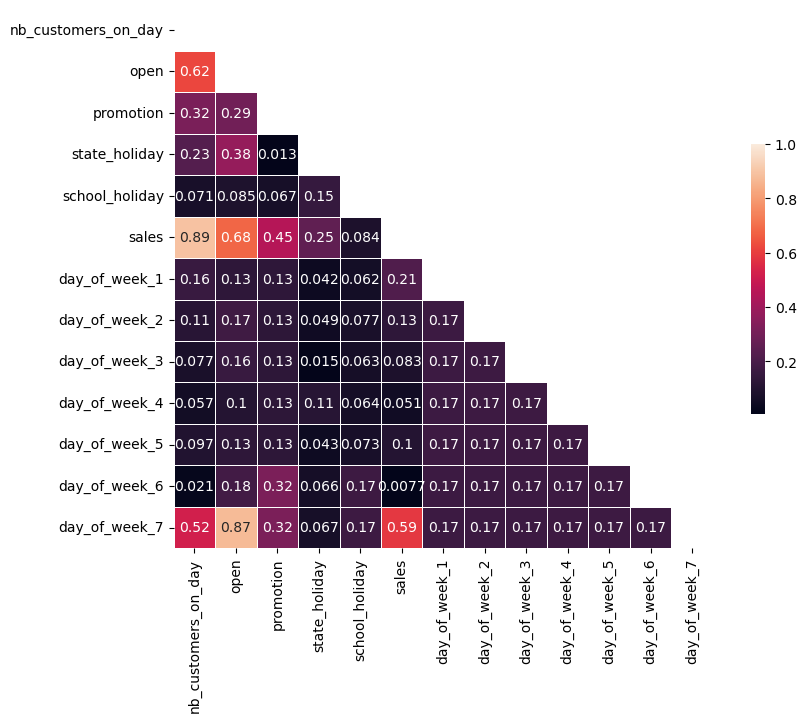

In [18]:
corr=np.abs(df_cleaned.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,7))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()


In [20]:
# Drop Open column -> High correlation
df_cleaned.drop(['open'], axis=1, inplace=True)

In [21]:
# X-Y Test Split
X = df_cleaned.drop(['sales'], axis=1)
y = df_cleaned['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train = pd.DataFrame(X_train, columns = X_train.columns)
X_train.head()

,nb_customers_on_day,promotion,state_holiday,school_holiday,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
506261,0.075119,0,0,0,False,True,False,False,False,False,False
488655,0.148223,1,0,0,False,False,False,False,True,False,False
255408,0.000000,0,0,0,False,False,False,False,False,False,True
131095,0.090143,0,0,0,False,False,False,False,False,True,False
151381,0.141993,1,0,0,False,True,False,False,False,False,False


In [23]:
X_test = pd.DataFrame(X_test, columns = X_test.columns)
X_test.head()

,nb_customers_on_day,promotion,state_holiday,school_holiday,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
373000,0.086479,1,0,0,False,False,False,False,True,False,False
591835,0.141627,1,0,0,False,True,False,False,False,False,False
358087,0.081165,1,0,0,False,True,False,False,False,False,False
399451,0.059362,0,0,0,False,False,False,False,False,True,False
387267,0.000000,0,0,0,False,False,False,False,False,False,True


In [24]:
# # K Nearest Neighbors Test for unscaled data


# # Import K Nearest Neighbors Regressor
# from sklearn.neighbors import KNeighborsRegressor

# # defines our knnregressor, using 10 neighbors
# knnregress = KNeighborsRegressor(n_neighbors=10)

# # Fits KNN to scaled data
# knnregress.fit(X_train, y_train)
# pred = knnregress.predict(X_test)
# # Print RMSE of model
# print("MAE", mean_absolute_error(pred, y_test))
# print("RMSE", mean_squared_error(pred, y_test, squared=False))
# print("R2 score", knnregress.score(X_test, y_test))

In [25]:

# # linear regression

# # define linear regression model
# lin_reg = LinearRegression()

# # Fit the model to the training data
# lin_reg.fit(X_train, y_train)

# # Predict on the test data
# pred = lin_reg.predict(X_test)

# # Print MAE, RMSE, and R2 score of the model
# print("MAE:", mean_absolute_error(y_test, pred))
# print("RMSE:", mean_squared_error(y_test, pred, squared=False))
# print("R2 score:", lin_reg.score(X_test, y_test))

In [26]:
# Decision Tree
# Import package

tree = DecisionTreeRegressor(max_depth=10)

# fit data to tree model
tree.fit(X_train, y_train)

pred = tree.predict(X_test)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test, y_test))


MAE 894.3973350662541
RMSE 1356.0458057688638
R2 score 0.8765623737196655


/Users/hoangleduc/ironhack/ih-labs/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [27]:
# Ensemble Method

In [28]:
# # Bagging and Pasting

# # Define Model
# bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
#                                n_estimators=100,
#                                max_samples = 1000)

# # Fit data to model
# bagging_reg.fit(X_train, y_train)

# # Set predictor
# pred = bagging_reg.predict(X_test)

# # Evaluate Results
# print("MAE", mean_absolute_error(pred, y_test))
# print("RMSE", mean_squared_error(pred, y_test, squared=False))
# print("R2 score", bagging_reg.score(X_test, y_test))


In [29]:
# # Random Patches
# # Initialize Random Forest
# forest = RandomForestRegressor(n_estimators=100,
#                              max_depth=20)

# # Train model
# forest.fit(X_train, y_train)

# # Set predictor
# pred = forest.predict(X_test)

# # Evaluate Model
# print("MAE", mean_absolute_error(pred, y_test))
# print("RMSE", mean_squared_error(pred, y_test, squared=False))
# print("R2 score", forest.score(X_test, y_test))



In [30]:
# # Import package
# # from sklearn.multioutput import MultiOutputRegressor

# # Initialize model
# gb_reg = GradientBoostingRegressor(max_depth=20,
#                                    n_estimators=100)

# # Set up a multi-output regressor since our target has multiple columns
# # mor = MultiOutputRegressor(gb_reg)

# # Train Model
# gb_reg.fit(X_train, y_train)

# # Set Predictor
# pred = gb_reg.predict(X_test)

# # Evaluate Model
# print("MAE", mean_absolute_error(pred, y_test))
# print("RMSE", mean_squared_error(pred, y_test, squared=False))
# print("R2 score", gb_reg.score(X_test, y_test))

In [31]:
# # Import necessary libraries
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.linear_model import LinearRegression

# # Define the base estimator
# # base_estimator = LinearRegression()

# # Define the AdaBoost regressor with the base estimator
# ada_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20), n_estimators=100)

# # Fit the model to the training data
# ada_regressor.fit(X_train, y_train)

# # Predict on the test data
# pred = ada_regressor.predict(X_test)

# # Print MAE, RMSE, and R² score of the model
# print("MAE:", mean_absolute_error(y_test, pred))
# print("RMSE:", mean_squared_error(y_test, pred, squared=False))
# print("R² score:", ada_regressor.score(X_test, y_test))

In [32]:
# # Import necessary libraries
# import xgboost as xgb
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.model_selection import train_test_split

# # Define the XGBoost regressor
# xgb_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# # Fit the model to the training data
# xgb_regressor.fit(X_train, y_train)

# # Predict on the test data
# pred = xgb_regressor.predict(X_test)

# # Print MAE, RMSE, and R² score of the model
# print("MAE:", mean_absolute_error(y_test, pred))
# print("RMSE:", mean_squared_error(y_test, pred, squared=False))
# print("R² score:", xgb_regressor.score(X_test, y_test))

In [33]:
# # Random Forest
# forest = RandomForestRegressor(n_estimators=100,
#                              max_depth=20)
# forest.fit(X_train, y_train)
# # Predict on the test data
# pred = forest.predict(X_test)

# # Print MAE, RMSE, and R² score of the model
# print("MAE:", mean_absolute_error(y_test, pred))
# print("RMSE:", mean_squared_error(y_test, pred, squared=False))
# print("R² score:", xgb_regressor.score(X_test, y_test))

In [34]:
# DecisionTreeRegressor: 0.8742888149316046 > XGBoost : 0.8729636201555728  = RandomForestRegressor: 0.8729636201555728

In [35]:
# DecisionTreeRegressor: 0.8765709494604368 | 1355.9986997946062 > XGBoost : 0.875111610878075 | 1363.991333495504  = RandomForestRegressor: 0.875111610878075 | 1397.724339233038

In [36]:
# HyperParameter Tuning for DecisionTreeRegressor

In [37]:
# # Define the parameter grid
# param_grid = {
#     'max_depth': [10, 11, 12,13,14],
#     'splitter': ['best', 'random'],
#     'min_samples_split': [7, 10, 15],
#     'min_samples_leaf': [3, 4, 5, 6],
#     'max_features': [None, 'auto', 'sqrt', 'log2']
# }

# # Initialize the DecisionTreeRegressor
# tree = DecisionTreeRegressor()

# # Initialize GridSearchCV with RMSE as the scoring metric
# grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


KeyboardInterrupt: 

In [ ]:
# # Predict on the test data using the best estimator
# best_tree = grid_search.best_estimator_
# pred = best_tree.predict(X_test)

# # Evaluate the model
# print("MAE:", mean_absolute_error(y_test, pred))
# print("RMSE:", mean_squared_error(y_test, pred, squared=False))
# print("R² score:", best_tree.score(X_test, y_test))

In [38]:
validation_url = 'https://www.dropbox.com/scl/fi/n68djgc0g8q752zqcvtkx/validation_for_students.csv?rlkey=x1nz5wd84j4c1rlc8aadzwuuy&st=k1zl7shs&dl=1'
validation = pd.read_csv(validation_url)
validation.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0


In [42]:
# Function to clean data 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def clean_df(df):
    df.columns = df.columns.str.lower()
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    
    df['state_holiday'] = df['state_holiday'].map({'0': 0, 'a': 1, 'b': 1, 'c': 1} )
    
    df = pd.get_dummies(df, columns=['day_of_week'])
    
    # Drop columns true_index and date
    df = df.drop(['true_index', 'date'], axis=1)
    
    df_cleaned = df.drop([ 'year', 'month', 'day'], axis=1)
    
    scaler = MinMaxScaler().fit(df_cleaned[['nb_customers_on_day']])
    df_cleaned['nb_customers_on_day'] = scaler.transform(df_cleaned[['nb_customers_on_day']])
    
    df_cleaned.drop(['open','store_id'], axis=1, inplace=True)
    
    return df_cleaned

In [43]:
tree.fit(X_train, y_train)
validation_cleaned = clean_df(validation)
pred = tree.predict(validation_cleaned)
pred

array([    0.        ,  4172.72727273,  6050.5443038 , ...,
       12058.5       ,     0.        ,  4117.77777778])

In [45]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71205 entries, 0 to 71204
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   true_index           71205 non-null  int64         
 1   store_id             71205 non-null  int64         
 2   day_of_week          71205 non-null  int64         
 3   date                 71205 non-null  datetime64[ns]
 4   nb_customers_on_day  71205 non-null  int64         
 5   open                 71205 non-null  int64         
 6   promotion            71205 non-null  int64         
 7   state_holiday        0 non-null      float64       
 8   school_holiday       71205 non-null  int64         
 9   year                 71205 non-null  int32         
 10  month                71205 non-null  int32         
 11  day                  71205 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(7)
memory usage: 5.7 MB


In [46]:
name_column = validation['true_index']

# Step 4: Create the new DataFrame
result_df = pd.DataFrame(name_column)
result_df['predicted_column'] = pred
result_df

,true_index,predicted_column
0,7,0.000000
1,19,4172.727273
2,31,6050.544304
3,45,2870.147541
4,56,3458.500000
...,...,...
71200,712004,6527.277778
71201,712018,7507.441860
71202,712020,12058.500000
71203,712023,0.000000


In [47]:
result_df.reset_index(drop=True, inplace=True)

# Step 5: Export the new DataFrame to a CSV file
result_df.to_csv('3toners.csv', index=False)

print(result_df)

       true_index  predicted_column
0               7          0.000000
1              19       4172.727273
2              31       6050.544304
3              45       2870.147541
4              56       3458.500000
...           ...               ...
71200      712004       6527.277778
71201      712018       7507.441860
71202      712020      12058.500000
71203      712023          0.000000
71204      712027       4117.777778

[71205 rows x 2 columns]


In [ ]:
# Best parameters found:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 15, 'splitter': 'best'}
# 0.8768 | 1354.2606297953569